In [48]:
import numpy as np
import pandas as pd
import time
from matplotlib import pyplot as plt
import os
from collections import OrderedDict
import sys
from sklearn.linear_model import SGDRegressor
data_base = "C:\\Users\\wenyang.zhang\\Documents\\MySpace\\Workspace\\SalesAnalies\\data\\csv"

In [16]:
# 获取日数据，对于日数据进行删掉异常值和分组聚合计算处理
dic = OrderedDict()
index = 16
month = 1
while index > 4:
    file_name = "data({}).csv".format(index)
    #print("load data: ", file_name)
    file_path = os.path.join(data_base, file_name)
    data = pd.read_csv(file_path)
    data.drop(["Unnamed: 0", "Outlet No"], inplace=True, axis=1)
    groupData = data.groupby(["Region", "Sub Region", "Material No"])
    groupData = groupData.sum()
    dic[month] = groupData
    print("complete month: ", month, "group size: ", np.shape(groupData))
    index -= 1
    month += 1

complete month:  1 group size:  (1510, 31)
complete month:  2 group size:  (1715, 28)
complete month:  3 group size:  (1925, 31)
complete month:  4 group size:  (1969, 30)
complete month:  5 group size:  (2055, 31)
complete month:  6 group size:  (2035, 30)
complete month:  7 group size:  (2076, 31)
complete month:  8 group size:  (2021, 31)
complete month:  9 group size:  (2026, 30)
complete month:  10 group size:  (1992, 31)
complete month:  11 group size:  (2009, 30)
complete month:  12 group size:  (2003, 31)


In [19]:
# 测试一下pandas merge函数
data_all1 = dic[1]
data_all2 = dic[2]
joinColumns = ["Region", "Sub Region", "Material No"]
data_all = pd.merge(dic[1], dic[2], on=joinColumns)
data_all = pd.merge(data_all, dic[3], on=joinColumns)


In [100]:
# 拼接所有日的数据
data_all = dic[1]
for i in range(2, 13):
    data_all = pd.merge(data_all, dic[i], on=["Region", "Sub Region", "Material No"])
print(np.shape(data_all))
print(data_all.info())
# 修改异常值（小于0）
for item in data_all.values:
    item[item<0] = 0

data_all.head()

(891, 365)
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 891 entries, (EOC, AnHui, 2022760) to (WOC, WOC4, 2043699)
Columns: 365 entries, 20180101 to 20181231
dtypes: float64(365)
memory usage: 2.5+ MB
None


20180101  20180102  20180103  20180104  \
Region Sub Region Material No                                           
EOC    AnHui      2022760          45.0      54.0      22.0       4.0   
                  2022861         114.0      67.0      30.0       8.0   
                  2024424           6.0       0.0       0.0       2.0   
                  2024425           2.0       1.0       1.0       0.0   
                  2024426           2.0       6.0       2.0       4.0   

                               20180105  20180106  20180107  20180108  \
Region Sub Region Material No                                           
EOC    AnHui      2022760          22.0      20.0       5.0      12.0   
                  2022861          33.0      48.0      94.0      56.0   
                  2024424           7.0       0.0      11.0       1.0   
                  2024425           0.0       6.0       9.0       8.0   
                  2024426           0.0       6.0       6.0       0.0   

                               20180109  20180110  ...  20181222  20181223  \
Region Sub Region Material No                      ...                       
EOC    AnHui      2022760          13.0      24.0  ...       0.0       0.0   
                  2022861          58.0       6.0  ...       0.0       0.0   
                  2024424           8.0       4.0  ...       7.0       2.0   
                  2024425           0.0       0.0  ...       8.0       5.0   
                  2024426           0.0       1.0  ...      15.0       0.0   

                               20181224  20181225  20181226  20181227  \
Region Sub Region Material No                                           
EOC    AnHui      2022760           0.0       0.0       0.0       0.0   
                  2022861           0.0       6.0       0.0       0.0   
                  2024424           0.0       1.0       2.0       0.0   
                  2024425           8.0       1.0       5.0       2.0   
                  2024426           0.0       0.0       0.0      16.0   

                               20181228  20181229  20181230  20181231  
Region Sub Region Material No                                          
EOC    AnHui      2022760           0.0       0.0       0.0       0.0  
                  2022861           0.0       0.0       0.0       0.0  
                  2024424           1.0       1.0       0.0       3.0  
                  2024425           1.0       1.0       3.0       2.0  
                  2024426           1.0       0.0       0.0       0.0  

[5 rows x 365 columns]

In [11]:
# 获取月份的全部数据（201801~201903）
file_name = "data(2).csv"
#print("load data: ", file_name)
file_path = os.path.join(data_base, file_name)
dataByMonth = pd.read_csv(file_path)
#print(dataByMonth.head())
dataByMonth_group = dataByMonth.groupby(["Region", "Sub Region", "Material NO"])
dataByMonth_group = dataByMonth_group.sum()
#print(np.shape(dataByMonth_group))
dataByMonth_group.fillna(0, inplace=True)
print(dataByMonth_group.head())

                               Unnamed: 0  Outlet No  201801  201802  201803  \
Region Sub Region Material NO                                                  
EOC    AnHui      2019178            1406   20048527     0.0     0.0     0.0   
                  2019181           16351  110179075     0.0     0.0     0.0   
                  2022688           28201  186306401    20.0    10.0    13.0   
                  2022723             901   13953170     0.0     0.0     0.0   
                  2022725           23386  137285982     0.0     0.0     0.0   

                               201804  201805  201806  201807  201808  201809  \
Region Sub Region Material NO                                                   
EOC    AnHui      2019178         0.0     0.0     0.0     0.0     0.0     0.0   
                  2019181         0.0     0.0     0.0     0.0     0.0     0.0   
                  2022688         0.0    36.0     6.0     0.0     0.0    15.0   
                  2022723         

type(prodcut_oneyear_data):  <class 'numpy.ndarray'> [45. 54. 22.  4. 22. 20.  5. 12. 13. 24. 21.  8.  6. 11. 40. 38. 26. 30.
 33.  8.  6. 46.  1.  5. 10. 32. 12. 33. 36. 40. 19.  3. 15. 30. 21.  8.
 16. 41. 13. 20. 23.  6. 28. 11. 53. 11. 12.  5. 24.  2. 33.  4. 33. 29.
 39. 51. 27. 76.  0.  6.  6.  9. 17. 12.  1. 26.  8. 14. 19.  5. 14.  4.
  8. 12. 15. 32. 34. 53. 35. 25. 27. 19. 79. 31. 46. 18. 65. 89. 20. 71.
  5.  0.  0.  2. 23.  3.  3. 30.  0. 28. 12.  0. 22. 17. 21. 19. 18. 29.
 43. 10.  9.  0. 33.  0.  0. 17. 16. 16. 19.  0.  4.  0.  4.  1.  7.  3.
  0.  4.  4.  4. 32. 37.  7. 40.  1.  7. 24.  1. 16.  0. 50.  0.  0. 11.
  4.  1.  4.  5.  0.  6.  0.  0.  8.  1.  4. 27.  8. 12. 20.  0.  4.  8.
 19. 13. 21.  0.  0.  0.  0.  0.  0.  2.  0.  0. 20.  0. 20.  0.  1. 20.
  0.  0.  0.  8.  0.  0.  0.  0.  0.  0. 16.  0.  0.  3.  1. 12.  4.  0.
  2. 48.  0.  4.  0.  0.  2. 32.  0.  0.  8.  0.  7.  0.  1.  0.  0.  0.
  0.  0. 20.  0.  0.  0.  0.  0.  0.  4.  0. 12.  0.  0.  0.  0.  8.  0

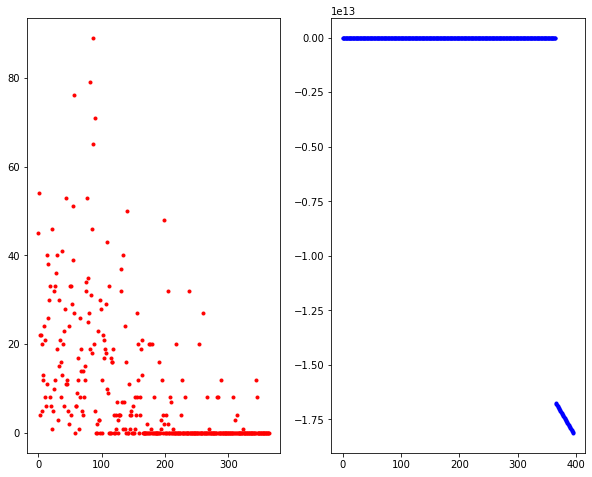

In [108]:
# 拟合日数据，做预测
# 发现有问题，就是拟合之后的预测值都是非常大，调整alpha值（0.0001->0.001)则会导致值非常小,难道是异常值导致的吗？
# 决定删掉异常值（outlier）
count = np.shape(data_all)[0]
#len(data_all.values[0])
data_all_arr = data_all.values
oneyear_day = list(range(365))
# print(oneyear_day)
colors = ['red', 'black', 'blue', 'brown', 'green']
plt.figure(figsize=(10, 8))
for i in range(1):
    dataByMonth_group.where
    prodcut_oneyear_data = data_all_arr[i]
    print("type(prodcut_oneyear_data): ", type(prodcut_oneyear_data), prodcut_oneyear_data)
    color_index = i % len(colors)
    plt.subplot(1,2,1)
    plt.plot(oneyear_day, prodcut_oneyear_data, "r.")
    sgd = SGDRegressor(random_state=42, alpha=0.001)
    x = np.array(oneyear_day).reshape(-1, 1)
    y = np.array(prodcut_oneyear_data).reshape(-1, 1)
    sgd.fit(x, y.ravel())
    jun_day = list(range(365, 365+31)) # 1月份的日期列表
    y_predict = sgd.predict(np.array(jun_day).reshape(-1, 1))
    print(y_predict)
    jun_sum = np.sum(y_predict)
    print("jun_sum: ", jun_sum)
    oneyear_day.extend(jun_day)
    #print(oneyear_day)
    print("oneyear_day length: ", len(oneyear_day))
    prodcut_oneyear_onemonth_data = prodcut_oneyear_data.tolist()
    prodcut_oneyear_onemonth_data.extend(y_predict.tolist())
    print("prodcut_oneyear_onemonth_data", prodcut_oneyear_onemonth_data)
    print("prodcut_oneyear_onemonth_data length: ", len(prodcut_oneyear_onemonth_data))
    plt.subplot(1,2,2)
    plt.plot(oneyear_day, prodcut_oneyear_onemonth_data, "b.")

c:\users\wenyang.zhang\documents\myspace\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


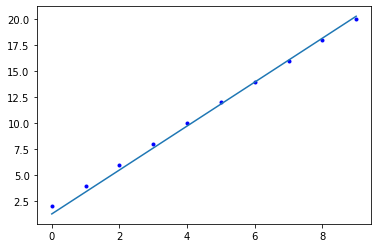

In [118]:
day = range(0, 10)
value = np.array([2,4,6,8,10,12,14,16,18,20])
plt.plot(day, value, "b.")
sgd.fit(np.array(day).reshape(-1, 1), value.reshape(-1,1))

y_predict = sgd.predict(np.array(day).reshape(-1, 1))
plt.plot(day, y_predict)